<a href="https://colab.research.google.com/github/Ian-G27/Clase_MetodosNumericos/blob/main/Nodos_De_Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nodos de Chebyshev

Instrucciones: Escribir un código para calcular n nodos de Chebyshev en el intervalo $[a, b]$.
Usarlo para construir el polinomio interpolante de Lagrange, con 7, 9 y 11 nodos, de la función de Runge en $[-1, 1]$.
Comparar las gráficas en un solo panel.


Nodos de Chebyshev para n = 7:
[ 0.974928  0.781831  0.433884  0.       -0.433884 -0.781831 -0.974928]

Nodos de Chebyshev para n = 9:
[ 0.984808  0.866025  0.642788  0.34202   0.       -0.34202  -0.642788
 -0.866025 -0.984808]

Nodos de Chebyshev para n = 11:
[ 0.989821  0.909632  0.75575   0.540641  0.281733  0.       -0.281733
 -0.540641 -0.75575  -0.909632 -0.989821]


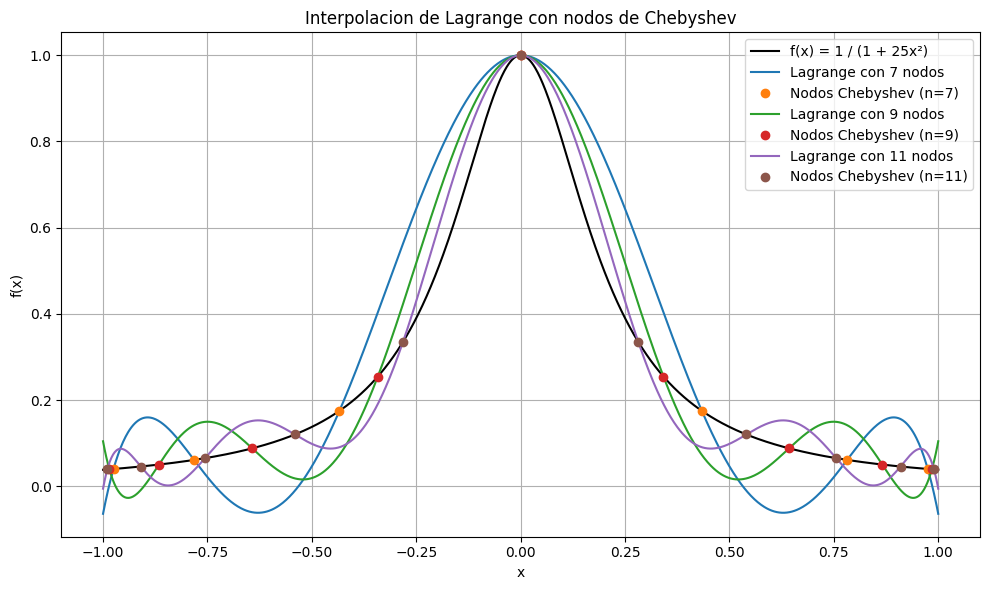

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
#Funcion de Runge
def runge_funcion(x):
    return 1 / (1 + 25 * x**2)
#Generador de nodos de Chebyshev en el intervalo [a, b]
def chebyshev_nodos(n, a=-1, b=1):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb
#Puntos que se usaran para graficar las funciones
x_fine = np.linspace(-1, 1, 1000)
y_true = runge_funcion(x_fine)
#Grafica
plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_true, 'k-', label='f(x) = 1 / (1 + 25x²)')
#Para n = 7, 9, 11 nodos
for n in [7, 9, 11]:
    x_nodos = chebyshev_nodos(n)
    y_nodos = runge_funcion(x_nodos)
    lagrange_polinomio = BarycentricInterpolator(x_nodos, y_nodos)
    y_interp = lagrange_polinomio(x_fine)
    plt.plot(x_fine, y_interp, label=f'Lagrange con {n} nodos')
    plt.plot(x_nodos, y_nodos, 'o', label=f'Nodos Chebyshev (n={n})')
    #Imprimire los nodos
    print(f"\nNodos de Chebyshev para n = {n}:")
    print(np.round(x_nodos, 6))
#Estetica del grafico
plt.title('Interpolacion de Lagrange con nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicacion paso a paso del codigo

#  Bibliotecas que se utilizaran en  el codigo


```
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
```

BarycentricInterpolator: lo usare como metodo eficiente para construir el polinomio de interpolacion de Lagrange.








# Funcion De Runge

$f(x) = 1 / (1 + 25x^2) $



```
def runge_function(x):
    return 1 / (1 + 25 * x**2)

```

Esta es la función clasica de Runge, que tiene un comportamiento oscilatorio especialmente al usar nodos igualmente espaciados. Usar nodos de Chebyshev ayuda a reducir estas oscilaciones.



#  Funcion para calcular nodos de chebyshev en el intervalo [a, b]



```
def chebyshev_nodes(n, a=-1, b=1):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

```

* k: índices de 1 a n.

* x_cheb: nodos de Chebyshev en [-1, 1].

* La última línea transforma esos nodos al intervalo [a,b] usando un cambio de variable lineal.




# Puntos que se evaluan para poder graficar



```
x_fine = np.linspace(-1, 1, 1000)
y_true = runge_function(x_fine)

```
* Se generaran 1000 puntos uniformes en [-1, 1] para trazar suavemente la función original y los polinomios interpolantes.

# Interpolación y graficación para n = 7, 9, 11 nodos



```
for n in [7, 9, 11]:
    x_nodes = chebyshev_nodes(n)
    y_nodes = runge_function(x_nodes)
    lagrange_poly = BarycentricInterpolator(x_nodes, y_nodes)
    y_interp = lagrange_poly(x_fine)

```

Para cada valor de $n:$
* Calcula los nodos de Chebyshev

* Evalúa la función de Runge en esos nodos

* Construye el polinomio de Lagrange

* Evalúa el polinomio


# Lo siguiente dibuja el polinomio y marca los nodos utilizados



```
    print(f"\nNodos de Chebyshev para n = {n}:")
    print(np.round(x_nodes, 6))

```

# Lo siguiente redondea el polinomio



```
    print(f"\nNodos de Chebyshev para n = {n}:")
    print(np.round(x_nodes, 6))

```





# Por ultimo grafica el polinomio



```
plt.title('Interpolacion de Lagrange con nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

```





# En conclusion

Lo que el codino nos muestra es:

1.  Cómo se comporta la interpolación de Lagrange usando nodos de Chebyshev.

2.  A diferencia de los nodos equidistantes, los de Chebyshev reducen las oscilaciones en los extremos (minimizan el efecto de Runge).

3.  Al aumentar n, la interpolación mejora en general, especialmente en los bordes del intervalo.


